In [170]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [171]:
train_data = pd.read_csv(r"D:\Datasets\titanic\train.csv")
test_data = pd.read_csv(r"D:\Datasets\titanic\test.csv")

In [172]:
train_data.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [173]:
test_data.head(3)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q


In [174]:
train_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [175]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [176]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [177]:
train_data.Embarked.isna().sum()

2

In [178]:
train_data.Embarked.unique()

array(['S', 'C', 'Q', nan], dtype=object)

<AxesSubplot:xlabel='Survived', ylabel='count'>

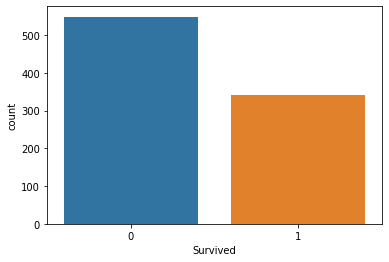

In [179]:
sns.countplot(x = train_data['Survived'])

<AxesSubplot:xlabel='Embarked', ylabel='count'>

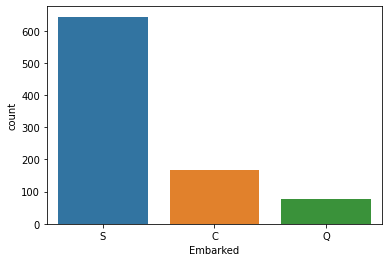

In [180]:
sns.countplot(x= train_data['Embarked'])

As S is more than C and Q so we fill none value with S

In [181]:
train_data.Embarked.fillna('S', inplace = True)
train_data.Embarked.isna().sum()

0

In [182]:
train_data.drop(['Name', 'Ticket', 'PassengerId'], axis = 1, inplace = True)
test_data.drop(['Name', 'Ticket'], axis = 1, inplace = True)

In [183]:
train_data.head(2)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,male,22.0,1,0,7.2500,NaN,S
1,1,1,female,38.0,1,0,71.2833,C85,C


In [184]:
train_data['Relatives'] = train_data['SibSp'] + train_data['Parch']
test_data['Relatives'] = test_data['SibSp'] + test_data['Parch']

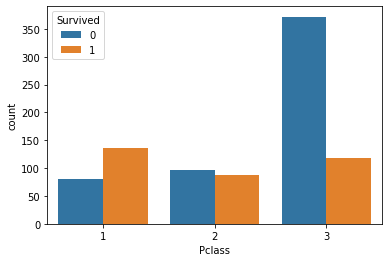

In [185]:
sns.countplot(data = train_data, x='Pclass', hue='Survived' )
plt.show()

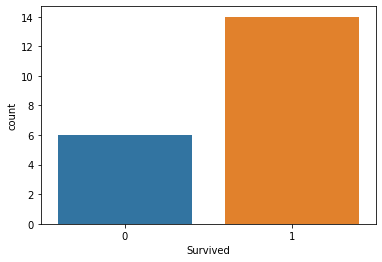

In [186]:
sns.countplot(x = train_data[train_data.Fare > 200]['Survived'])
plt.show()

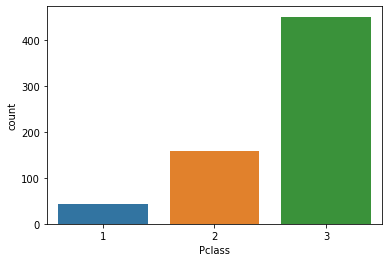

In [187]:
sns.countplot(x = train_data[train_data.Fare < 30]['Pclass'])
plt.show()

<AxesSubplot:xlabel='Sex', ylabel='count'>

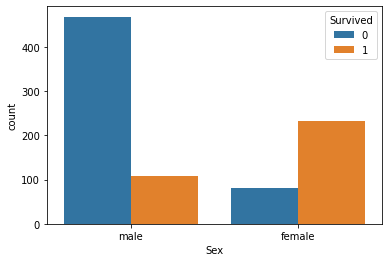

In [188]:
sns.countplot(data = train_data, x='Sex', hue='Survived')

In [189]:
train_data = train_data[train_data.Fare != 0]

In [190]:
std = train_data.Fare.std()
mn = train_data.Fare.mean()

In [191]:
train_data[train_data.Pclass == 3].describe()

,Survived,Pclass,Age,SibSp,Parch,Fare,Relatives
count,487.000000,487.0,351.000000,487.000000,487.000000,487.000000,487.000000
mean,0.242300,3.0,25.059601,0.620123,0.396304,13.787875,1.016427
std,0.428915,0.0,12.483653,1.379392,0.891793,11.760718,1.959397
min,0.000000,3.0,0.420000,0.000000,0.000000,4.012500,0.000000
25%,0.000000,3.0,18.000000,0.000000,0.000000,7.750000,0.000000
50%,0.000000,3.0,24.000000,0.000000,0.000000,8.050000,0.000000
75%,0.000000,3.0,32.000000,1.000000,0.000000,15.500000,1.000000
max,1.000000,3.0,74.000000,8.000000,6.000000,69.550000,10.000000


In [192]:
train_data[train_data.Pclass == 2].describe()

,Survived,Pclass,Age,SibSp,Parch,Fare,Relatives
count,178.000000,178.0,173.000000,178.000000,178.000000,178.000000,178.000000
mean,0.488764,2.0,29.877630,0.415730,0.393258,21.358661,0.808989
std,0.501284,0.0,14.001077,0.607095,0.698958,13.083169,1.061673
min,0.000000,2.0,0.670000,0.000000,0.000000,10.500000,0.000000
25%,0.000000,2.0,23.000000,0.000000,0.000000,13.000000,0.000000
50%,0.000000,2.0,29.000000,0.000000,0.000000,15.022900,0.000000
75%,1.000000,2.0,36.000000,1.000000,1.000000,26.000000,2.000000
max,1.000000,2.0,70.000000,3.000000,3.000000,73.500000,5.000000


In [193]:
train_data['Fare per person'] = train_data['Fare'] / (train_data['Relatives'] + 1)
test_data['Fare per person'] = test_data['Fare'] / (test_data['Relatives'] + 1)

In [194]:
train_data = train_data[train_data['Fare per person'] < 58]

In [195]:
train_data.shape

(831, 11)

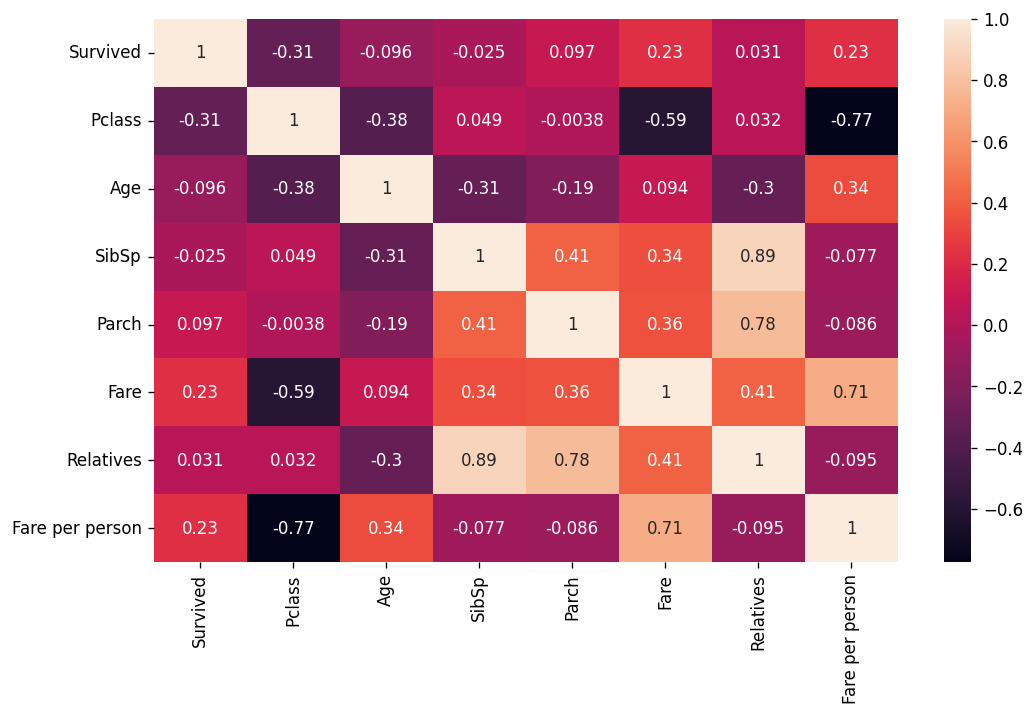

In [196]:
plt.figure(figsize=(10,6),dpi=120)
sns.heatmap(train_data.corr(), annot = True)
plt.show()

In [197]:
# from sklearn.pipeline import Pipeline
# from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder

In [198]:
# X_train = df_train.drop('Survived',axis =1)
# y_train = df_train.Survived
# X_test = df_test.copy()

In [199]:
# num_pipeline = Pipeline([('impute',SimpleImputer(strategy='median')),
#                          ('std_scaler',StandardScaler())])
#
# col = ColumnTransformer([('num',num_pipeline,['Age','SibSp','Parch','Fare','Pclass']),
#                          ('ohe_encode',OneHotEncoder(),["Sex","Embarked"])])

In [200]:
train_data.isna().sum()

Survived             0
Pclass               0
Sex                  0
Age                163
SibSp                0
Parch                0
Fare                 0
Cabin              663
Embarked             0
Relatives            0
Fare per person      0
dtype: int64

In [201]:
train_data.drop('Cabin', axis=1, inplace=True)
test_data.drop('Cabin', axis=1, inplace=True)

In [202]:
type(train_data['Age'][0])

numpy.float64

In [203]:
train_data.Age.fillna(train_data.Age.median(), inplace=True)

In [205]:
imputer = SimpleImputer(strategy='median')
test_data[['Age', 'Fare', 'Fare per person']] = imputer.fit_transform(test_data[['Age', 'Fare', 'Fare per person']])

In [206]:
train_data.head(1)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Relatives,Fare per person
0,0,3,male,22.0,1,0,7.25,S,1,3.625


In [208]:
# train_data['sex']=  train_data.Sex.apply(lambda x: 0 if x == 'male' else 1)
# test_data['sex']=  test_data.Sex.apply(lambda x: 0 if x == 'male' else 1)

In [209]:
ohe = OneHotEncoder(sparse=False,drop = 'first')

In [210]:
train_data['Sex'] = ohe.fit_transform(train_data[['Sex']])
test_data['Sex'] = ohe.fit_transform(test_data[['Sex']])

In [211]:
train_data = pd.concat([train_data,pd.get_dummies(train_data['Embarked'])],axis=1)
train_data.drop('Embarked',axis=1,inplace=True)

In [212]:
test_data = pd.concat([test_data,pd.get_dummies(test_data['Embarked'])],axis=1)
test_data.drop('Embarked',axis=1,inplace=True)

In [213]:
# transform_pipe_train = col.fit_transform(X_train)
# transform_pipe_test = col.fit_transform(X_test)

In [214]:
# X_train_transform = pd.DataFrame(transform_pipe_train)
# X_test_transform = pd.DataFrame(transform_pipe_test)

In [215]:
# X_train_transform.drop(5,axis=1,inplace=True)
# X_test_transform.drop(5,axis=1,inplace=True)

In [216]:
X_train = train_data.drop('Survived', axis=1)
y_train = train_data.Survived

In [217]:
X_train.head(2)

,Pclass,Sex,Age,SibSp,Parch,Fare,Relatives,Fare per person,C,Q,S
0,3,1.0,22.0,1,0,7.2500,1,3.62500,0,0,1
1,1,0.0,38.0,1,0,71.2833,1,35.64165,1,0,0


In [218]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [219]:
lr_model = LogisticRegression()
dct_model = DecisionTreeClassifier()
rf_model =RandomForestClassifier()
grbt_model = GradientBoostingClassifier()
adbc_model = AdaBoostClassifier()

In [220]:
models = [lr_model,dct_model,rf_model,grbt_model,adbc_model]
names = ['LogisticRegression','DecisionTree','Random Forest','Adaboost','G boosting']

In [221]:
for name,model in zip(names,models):
    print(f'{name} score --> {cross_val_score(model,X_train,y_train,cv=4)}')
    print('------------------------------------------------------------------------')

C:\Users\91737\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\91737\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/st

LogisticRegression score --> [0.77403846 0.79807692 0.75961538 0.80676329]
------------------------------------------------------------------------
DecisionTree score --> [0.69711538 0.79326923 0.76442308 0.76328502]
------------------------------------------------------------------------
Random Forest score --> [0.76442308 0.83173077 0.80288462 0.80676329]
------------------------------------------------------------------------
Adaboost score --> [0.77884615 0.84615385 0.82211538 0.82125604]
------------------------------------------------------------------------
G boosting score --> [0.77403846 0.82692308 0.80288462 0.83091787]
------------------------------------------------------------------------


In [222]:
# X.shape

In [223]:
rf_model = RandomForestClassifier()
rf_model.fit(X_train,y_train)

RandomForestClassifier()

Almost every model performance is same on the data so we will try grid search

In [224]:
lr_model = LogisticRegression()
lr_model.fit(X_train,y_train)

C:\Users\91737\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [225]:
adbc_model.fit(X_train,y_train)

AdaBoostClassifier()

In [226]:
# from sklearn.model_selection import GridSearchCV

In [227]:
# models = [LogisticRegression(),SVC(),DecisionTreeClassifier()]
# parameter = {'Logistic Regression' : {'C' : [5,8,10,20,50],'solver' :['liblinear','lbfgs']},
#              "SVM": {'kernel':['rbf','poly','linear'],"degree":[1,2,3],'C':[20,50,70,100]},
#              'Decision Tree': {'max_depth':[3,5,6,8,10],'min_samples_split':[10,30,50,80,100,120]}}

In [228]:
# for model,(key,value) in zip(models,parameter.items()):
#     grid_model = GridSearchCV(model,param_grid=value,cv=3)
#     grid_model.fit(X_train,y_train)
#     print(f'Best parameters for {key} is {grid_model.best_params_}')

In [229]:
# svm_clf = SVC(C=50,degree=2,kernel='poly')
# svm_clf.fit(X_train,y_train)

In [230]:
test_data.head(2)

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Relatives,Fare per person,C,Q,S
0,892,3,1.0,34.5,0,0,7.8292,0,7.8292,0,1,0
1,893,3,0.0,47.0,1,0,7.0000,1,3.5000,0,0,1


In [231]:
test_data.isna().sum()

PassengerId        0
Pclass             0
Sex                0
Age                0
SibSp              0
Parch              0
Fare               0
Relatives          0
Fare per person    0
C                  0
Q                  0
S                  0
dtype: int64

In [232]:
for name,score in zip(list(test_data.columns),rf_model.feature_importances_):
    print(f'{name} ---> {score}')

PassengerId ---> 0.06191919831664755
Pclass ---> 0.23497448945884
Sex ---> 0.24762008548596248
Age ---> 0.026268804159193186
SibSp ---> 0.02434021502048193
Parch ---> 0.16205219557643544
Fare ---> 0.048786666083656886
Relatives ---> 0.1594894599539022
Fare per person ---> 0.012901382358990835
C ---> 0.007229934398877597
Q ---> 0.014417569187011831


In [233]:
y_pred_rf = rf_model.predict(test_data.drop('PassengerId', axis=1))

In [234]:
y_pred_lr = (lr_model.predict(test_data.drop('PassengerId', axis=1))).astype(int)

In [235]:
# y_pred = y_pred.astype(int)

In [236]:
# df_rf = pd.concat([pd.Series(df_test.PassengerId),pd.Series(y_pred)],axis = 1)
# df_rf = pd.DataFrame(df_rf)
# df_rf.rename(columns={0:'Survived'},inplace=True)

In [237]:
y_pred_adbc = adbc_model.predict(test_data.drop('PassengerId', axis=1))

In [238]:
# df_adbc = pd.concat([pd.Series(test_data.PassengerId), pd.Series(y_pred)], axis = 1)
# df_adbc = pd.DataFrame(df_adbc)
# df_adbc.rename(columns={0: 'Survived'}, inplace=True)

In [239]:
# df_lr.Survived = df_lr.Survived.apply(lambda x: int(x))

In [240]:
# type(df_lr.Survived[5])

In [241]:
# df_adbc.to_csv(r'D:\Datasets\titanic\adaboost_submission.csv', index=False)

In [242]:
# s = pd.read_csv(r"D:\Datasets\titanic\submission.csv")

In [243]:
test_data_rf = pd.concat([test_data,pd.Series(y_pred_rf)],axis=1)
test_data_rf = test_data_rf.rename(columns={0:'Survived'})

In [244]:
test_data_rf['Sex'] = ohe.inverse_transform(test_data_rf[['Sex']])

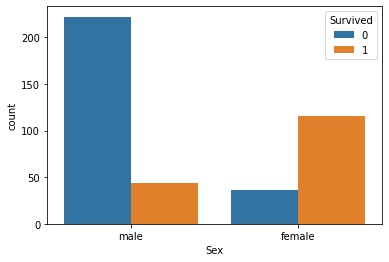

In [245]:
sns.countplot(data = test_data_rf,x='Sex',hue='Survived')
plt.show()

In [246]:
test_data_rf.head(2)

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Relatives,Fare per person,C,Q,S,Survived
0,892,3,male,34.5,0,0,7.8292,0,7.8292,0,1,0,0
1,893,3,female,47.0,1,0,7.0000,1,3.5000,0,0,1,0


,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Relatives,Fare per person,C,Q,S,Survived
0,892,3,male,34.5,0,0,7.8292,0,7.8292,0,1,0,0
1,893,3,female,47.0,1,0,7.0000,1,3.5000,0,0,1,0


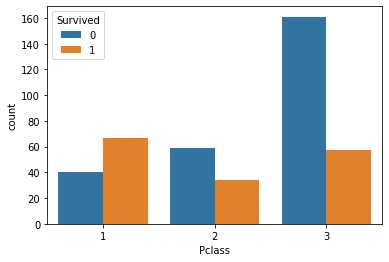

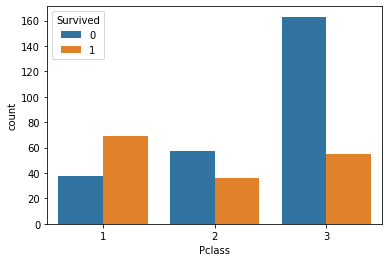

In [247]:
sns.countplot(data = test_data_rf,x='Pclass',hue = 'Survived')
plt.show()